In [1]:
import numpy as np
import pyccl as ccl
import matplotlib.pylab as plt 

# plotting tricks 
plt.rc("text", usetex=True)
plt.rc("font", **{"family": "sans-serif", "serif": ["Palatino"]})
fontSize = 20 

# Install $\texttt{amemu}$

```
git clone https://github.com/Harry45/amemu.git
pip install -r requirements.txt
pip install -i https://test.pypi.org/simple/ amemu==0.0.18
```

# Run  $\texttt{amemu}$ within CCL

In [2]:
# Cosmology
cosmo = {'Omega_cdm': 0.25, 'Omega_b': 0.04, 'h': 0.70, 'n_s': 1.0, 'sigma8': 0.75}

In [3]:
emulator = ccl.amemuLinear(download=False)

In [4]:
print(str(emulator))

amemu linear matter power spectrum:k_min=0.0001,k_max=50.0,z_min=0.0,z_max=5.0


In [5]:
redshifts = np.array([0.0, 0.2])
scalefactor = 1. / (1. + redshifts)

In [6]:
%%time
wavenumbers, pklin = emulator.get_pk_at_a(cosmo, a=scalefactor)

CPU times: user 12.1 ms, sys: 4.04 ms, total: 16.1 ms
Wall time: 35.7 ms


In [7]:
%%time
ccl_pk2d = emulator.get_pk2d(cosmo)

CPU times: user 113 ms, sys: 217 µs, total: 113 ms
Wall time: 113 ms


# Plot the linear matter power spectrum

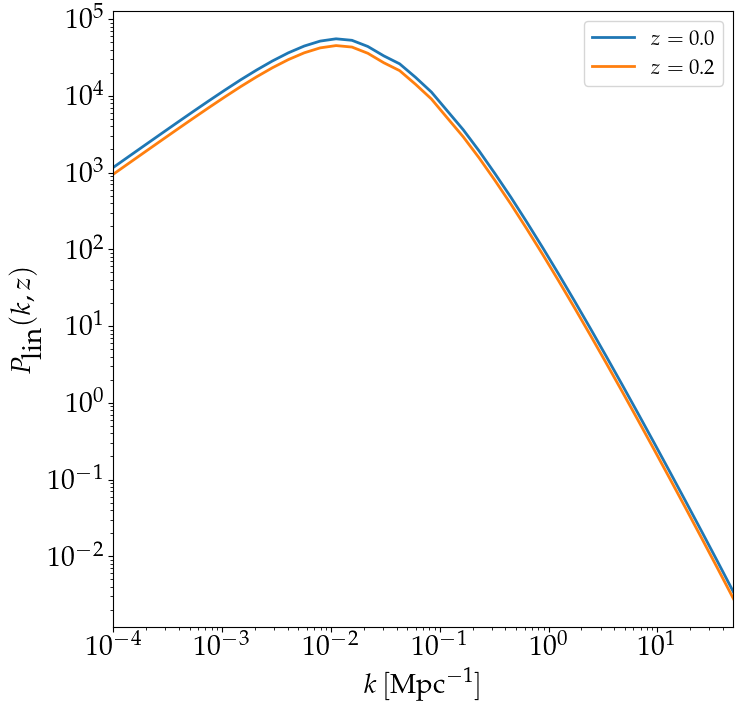

In [8]:
plt.figure(figsize = (8,8))
plt.loglog(wavenumbers, pklin[0], lw = 2, label = r'$z=0.0$')
plt.loglog(wavenumbers, pklin[1], lw = 2, label = r'$z=0.2$')
plt.xlim(min(wavenumbers), max(wavenumbers))
plt.ylabel(r'$P_{\textrm{lin}}(k,z)$', fontsize = fontSize)
plt.xlabel(r'$k\,[\textrm{Mpc}^{-1}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':15})
plt.show()